# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

In this analysis, we will be examining and comparing ACT and SAT data from across the United States so that we may infer and make recommendations for increasing SAT participation rates in  **State**

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [110]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
sat_2017[:10]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_2017[:10]

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

# Initial Description

From our data given we can ascertain a few things from immediately looking at it. The most easily noticeable thing is probably the difference in participation rates the ACT and SAT.

###### Participation Rates
While there are some states where SAT participation rate is higher than ACT participation rate, there is only a single case of a state with ACT participation rates under 10% in 2017 (Maine). Compare that to the 18 states where SAT participation was under 10% in 2017 and it is immediately understandable why the problem we are trying to solve is increasing SAT participation rates. A few other interesting observations about participation rates: there are a select number of states that have 100% participation rates in either the ACT or SAT but never both. That begs the question of whether or not these tests are mandatory for students in those states. 

#### 4a. Does the data look complete? 

Yes, the data does look complete. There are a few datatypes that need to be corrected to efficently use summary statistics but there is nothing that leaps out as missing. The only thing that might be missing is a national average score for the SAT, which is provided with the ACT dataset. These numbers can be inferred, though.

In [6]:
act_2017.min()

State            Alabama
Participation        60%
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
dtype: object

In [7]:
sat_2017.min()

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

###### SAT Minimums
- Participation: 2%
- Evidence-Based Reading and Writing: 482
- Math: 52
- Total: 950

###### ACT Minimums
- Participation: 8%
- English: 16.3
- Math: 18
- Reading: 18.1
- Science: 2.3
- Composite: 17.8

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [8]:
sat_2017['Math'].replace(52, 524, inplace = True)

In [9]:
act_2017['Science'].replace(2.3, 23.2, inplace = True)

In [10]:
act_2017['Composite'].replace('20.2x', 20.2, inplace = True)

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [12]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Participation is classified as an object for both ACT and SAT. It would be better classified as an int (just strip the %). The ACT composite scores are also classified objects(string), so those also need to be changed to floats.**

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
#Takes the 'Participation' series from the dataframe, removes all %s, then converts the series datatype to int.
def nopercent(dataframe):
    dataframe['Participation'] = dataframe['Participation'].str.replace('%', '').astype(int)

nopercent(sat_2017)
nopercent(act_2017)

In [14]:
act_2017['Composite'] = act_2017['Composite'].astype(float)

In [15]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [16]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
#code

- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [19]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [22]:
#Renaming columns using dictionary method.
act_2017.rename(columns = {'State':'state', 'Participation':'act_2017_percent_participation', 
                           'English':'act_2017_english',
                          'Math':'act_2017_math', 'Reading':'act_2017_reading', 
                            'Science':'act_2017_science', 'Composite':'act_2017_composite'}, inplace=True)
act_2017.columns

Index(['state', 'act_2017_percent_participation', 'act_2017_english',
       'act_2017_math', 'act_2017_reading', 'act_2017_science',
       'act_2017_composite'],
      dtype='object')

In [23]:
sat_2017.rename(columns = {'State':'state', 'Participation':'sat_2017_percent_participation',
                           'Evidence-Based Reading and Writing':'sat_2017_reading_writing',
                           'Math':'sat_2017_math', 'Total':'sat_2017_total'}, inplace = True)

sat_2017.columns

Index(['state', 'sat_2017_percent_participation', 'sat_2017_reading_writing',
       'sat_2017_math', 'sat_2017_total'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT 2017, SAT 2017, ACT 2018, SAT 2018|The state in which the ACT and SAT results were gathered from.|
|act_2017_percent_participation|integer|ACT 2017|The 2017 ACT participation percentage in row's state|
|act_2017_english|float|ACT 2017|The average 2017 ACT english score in row's state|
|act_2017_math|float|ACT 2017|The average 2017 ACT math score in row's state|
|act_2017_reading|float|ACT 2017|The average 2017 ACT reading score in row's state|
|act_2017_science|float|ACT 2017|The average 2017 ACT science score in row's state|
|act_2017_composite|float|ACT 2017|The average 2017 ACT composite score in row's state|
|sat_2017_percent_participation|integer|SAT 2017|The 2017 SAT participation percentage in row's state|
|sat_2017_reading_writing|integer|SAT 2017|The average 2017 SAT reading and writing score in row's state|
|sat_2017_math|integer|SAT 2017|The average 2017 SAT math score in row's state|
|sat_2017_total|integer|SAT 2017|The average 2017 SAT total score in row's state|
|act_2018_percent_participation|integer|ACT 2018|The 2018 ACT participation percentage in row's state|
|act_2018_english|float|ACT 2018|The average 2018 ACT english score in row's state|
|act_2018_math|float|ACT 2018| The average 2018 ACT math score in row's state|
|act_2018_reading|float|ACT 2018|The average 2018 ACT reading score in row's state|
|act_2018_science|float|ACT 2018|The average 2018 ACT science score in row's state|
|act_2018_composite|float|ACT 2018| The average 2018 ACT composite score in row's state|
|sat_2018_percent_participation|integer|SAT 2018|The 2018 SAT participation percentage in row's state|
|sat_2018_reading_writing|integer|SAT 2018|The average 2018 SAT reading and writing score in row's state|
|sat_2018_math|integer|SAT 2018|The average 2018 SAT math score in row's state|
|sat_2018_total|integer|SAT 2018|The average 2018 SAT total score in row's state|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
#There was an extra index column that somehow appeared in this df so this is dropping it and then resetting the index so everything plays nicely together in the future.
act_2017.drop([0], axis = 0, inplace = True)

act_2017.reset_index(inplace = True)


In [25]:
act_2017.head()

,index,state,act_2017_percent_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,1,Alabama,100,18.9,18.4,19.7,19.4,19.2
1,2,Alaska,65,18.7,19.8,20.4,19.9,19.8
2,3,Arizona,62,18.6,19.8,20.1,19.8,19.7
3,4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
4,5,California,31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [655]:
#Merging SAT 2017 and ACT 2017 dataframes together using 'on = [state]' so that there will just be one state column.
act_sat_2017 = pd.merge(sat_2017, act_2017, on = ['state'])
act_sat_2017.head()

,state,sat_2017_percent_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,index,act_2017_percent_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,5,593,572,1165,1,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,2,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,3,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,4,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,5,31,22.5,22.7,23.1,22.2,22.8


In [27]:
act_sat_2017.drop(columns = ['index'], inplace = True)

In [28]:
act_sat_2017.head()

,state,sat_2017_percent_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,act_2017_percent_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
act_sat_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
# ACT Data obtained from https://magoosh.com/hs/act/2016/average-act-score-by-state/  
# and http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf
# SAT Data obtained from https://reports.collegeboard.org/sat-suite-program-results/state-results

sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [31]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1168
4,California,60%,540,536,1076


In [32]:
act_2018.head()

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100%,18.9,18.3,19.6,19.0,19.1
1,Alaska,33%,19.8,20.6,21.6,20.7,20.8
2,Arizona,66%,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100%,19.1,18.9,19.7,19.4,19.4
4,California,27%,22.5,22.5,23.0,22.1,22.7


In [33]:
#Using defined nopercent function to remove percentages from Participation and convert them to integers
nopercent(sat_2018)
nopercent(act_2018)

In [34]:
#Checking to make sure that function worked properly
print(act_2018.head())
print(sat_2018.head())

        State  Participation  English  Math  Reading  Science  Composite
0     Alabama            100     18.9  18.3     19.6     19.0       19.1
1      Alaska             33     19.8  20.6     21.6     20.7       20.8
2     Arizona             66     18.2  19.4     19.5     19.2       19.2
3    Arkansas            100     19.1  18.9     19.7     19.4       19.4
4  California             27     22.5  22.5     23.0     22.1       22.7
        State  Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama              6                                 595   571   1166
1      Alaska             43                                 562   544   1106
2     Arizona             29                                 577   572   1149
3    Arkansas              5                                 592   576   1168
4  California             60                                 540   536   1076


In [35]:
#Renaming act_2018 columns so they have the same format as act_2017 columns
act_2018.rename(columns = {'State':'state', 'Participation':'act_2018_percent_participation', 
                           'English':'act_2018_english',
                          'Math':'act_2018_math', 'Reading':'act_2018_reading', 
                            'Science':'act_2018_science', 'Composite':'act_2018_composite'}, inplace=True)
act_2018.columns

Index(['state', 'act_2018_percent_participation', 'act_2018_english',
       'act_2018_math', 'act_2018_reading', 'act_2018_science',
       'act_2018_composite'],
      dtype='object')

In [36]:
#Renaming sat_2018 columns so they have the same format as sat_2017 columns
sat_2018.rename(columns = {'State':'state', 'Participation':'sat_2018_percent_participation',
                           'Evidence-Based Reading and Writing':'sat_2018_reading_writing',
                           'Math':'sat_2018_math', 'Total':'sat_2018_total'}, inplace = True)

sat_2018.columns

Index(['state', 'sat_2018_percent_participation', 'sat_2018_reading_writing',
       'sat_2018_math', 'sat_2018_total'],
      dtype='object')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [37]:
#Merging sat_2018 and act_2018 dataframes on 'state' so they share the state series but retain everything else 
#independently
act_sat_2018 = pd.merge(sat_2018, act_2018, on = ['state'])
act_sat_2018.head()

,state,sat_2018_percent_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total,act_2018_percent_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,5,592,576,1168,100,19.1,18.9,19.7,19.4,19.4
4,California,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [38]:
#Merging the act_sat_2017 and act_sat_2018 dataframes into one combrehensive dataframe that encompasses 
#ACT and SAT participation and scores from 2017-2018
act_sat_final = pd.merge(act_sat_2017, act_sat_2018, on = ['state'])
act_sat_final.head()

,state,sat_2017_percent_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,act_2017_percent_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_percent_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total,act_2018_percent_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,5,592,576,1168,100,19.1,18.9,19.7,19.4,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [39]:
#Saving the merged dataframe as final.csv
act_sat_final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [287]:
act_sat_final.head(5)

,state,sat_2017_percent_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,act_2017_percent_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_percent_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total,act_2018_percent_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,5,592,576,1168,100,19.1,18.9,19.7,19.4,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [200]:
#Parts of this code inspired by stackoverflow code (mostly the instantiation at the beginning and naming the mean variable)
#To get standard deviation:
#Step 1: Find the mean.
#Step 2: For each data point, find the square of its distance to the mean.
#Step 3: Sum the values from Step 2.
#Step 4: Divide by the number of data points.
#Step 5: Take the square root.

def stdeviation(numbers):
    #Instantiate 
    sumnums = 0.0
    # The mean is the sum of all the numbers in given list -- defining it to a variable so that I can understand
    # My code better in the future
    mean = (sum(numbers)/len(numbers))
    #For each number in the list of numbers
    for num in numbers:
        #take that number and subtract it from the mean to find its distance to the mean, then square that number
        #this will loop for every number in numbers, taking all the values and adding them together
        sumnums += (num - mean) ** 2
    #The function will then divide the sum of all the numbers by the number of datapoints, and then take the square 
    #root of that number
    return (sumnums/len(numbers)) ** 0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [201]:
sd= {x:stdeviation(act_sat_final[x]) for x in act_sat_final if x != 'state'}

In [204]:
np.std(act_sat_final['sat_2017_percent_participation'])

34.92907076664508

In [657]:
sd

{'sat_2017_percent_participation': 34.92907076664508,
 'sat_2017_reading_writing': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2017_percent_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2018_percent_participation': 36.93321382897817,
 'sat_2018_reading_writing': 44.864630427956726,
 'sat_2018_math': 48.97751133618255,
 'sat_2018_total': 93.51362961350053,
 'act_2018_percent_participation': 33.745194881997506,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'act_2018_composite': 2.0855261815801147}

In [205]:
act_sat_final.std()

sat_2017_percent_participation    35.276632
sat_2017_reading_writing          45.666901
sat_2017_math                     47.121395
sat_2017_total                    92.494812
act_2017_percent_participation    32.140842
act_2017_english                   2.353677
act_2017_math                      1.981989
act_2017_reading                   2.067271
act_2017_science                   1.739353
act_2017_composite                 2.020695
sat_2018_percent_participation    37.300718
sat_2018_reading_writing          45.311056
sat_2018_math                     49.464862
sat_2018_total                    94.444136
act_2018_percent_participation    34.080976
act_2018_english                   2.446356
act_2018_math                      2.035765
act_2018_reading                   2.167245
act_2018_science                   1.870114
act_2018_composite                 2.106278
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

> - ***My manually calculated standard deviation matches with numpy but not pandas. After looking this up (https://stackoverflow.com/questions/25695986/pandas-why-pandas-series-std-is-different-from-numpy-std) it seems that Pandas uses Bessel's correction when accounting for standard deviation while NumPy does not. Much like NumPy, my function also does not use this correction, which is why I get the same numbers.***

In [212]:
df = act_sat_final #Just creating this df variable so I can more easily examine trends and do visualization

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.


### Sat 2017-2018
 
> ##### Participation 
 - Lowest Participation Rates in 2017
     - North Dakota:2%, Mississippi:2%, Iowa:2%, (MS, UT, SD, NB, WI, MN, WY, AR, KS):3%
 - Lowest Participation Rates in 2018
     - North Dakota:2%, (WY, SD, NB, WI, IA):3%
 - Highest Participation Rates in 2017
     - Washington DC:100%, Michigan:100%, Conneticut:100%, Delaware:100%, New Hampshire:96%
 - Highest Participation Rates in 2018
     - Michigan:100%, Conneticut:100%, Delaware:100%, Idaho:100%, Maine:99%

> ##### Total Score
 - Lowest Average Total Scores in 2017
     - Washington DC:950, Delaware:996, Idaho:1005, Michigan:1005, Maine:1012
 - Lowest Average Total Scores in 2018
     - Washington DC:977, Delaware:997. West Virginia:999, Idaho:1001, Michigan:1010
 - Highest Average Total Score in 2017
     - Minnesota:1295, Wisconsin:1291, Iowa:1275, Missouri:1271, Kansas:1260
 - Highest Average Total Score in 2018
     - Minnesota:1298, Wisconsin:1294, North Dakota:1283, Missouri:1272, Iowa:1265

### Act 2017-2018
 
> ##### Participation 
 - Lowest Participation Rates in 2017
     - Maine:8%, New Hampshire:18%, Delaware:18%, Rhode Island:21%, Pennsylvania:23%
 - Lowest Participation Rates in 2018
     - Maine:7%, Rhode Island:15%, New Hampshire:16%, Delaware:17%, Pennsylvania:20%
 - Highest Participation Rates in 2017
     - (AL, KY, WI, UT, TN, SC, OK, NC, NV, MT, MS, MN, LA, MI, WY, CO, AK):100%
 - Highest Participation Rates in 2018
     - (AL, KY, WI, UT, TN, SC, OK, OH, NC, NV, NB, MT, MS, LA, MI, WY, AK):100%

> ##### Total Score
 - Lowest Composite Scores in 2017
     - Nevada:17.8, Mississippi:18.6, South Carolina:18.7, Hawaii:19.0, North Carolina:19.1
 - Lowest Composite Scores in 2018
     - Nevada:17.7, South Caroline:18.3, Mississippi:18.6, Hawaii:18.9, Alabama:19.1
 - Highest Composite Scores in 2017
     - New Hampshire:25.5, Massachusetts:25.4, Connecticut:25.2, Maine:24.3, District of Columbia:24.2
 - Highest Composite Scores in 2018
     - Connecticut:25.6, Massachusets:25.5, New Hampshire:25.1, New York:24.5, Michigan:24.4
     
### 100% Participation

> ##### SAT
- DC went from 100% participation in 2017 --> 92% participation in 2018
- Idaho went from 93% participation in 2017 --> 100% participation in 2018
- Connecticut and Delaware both had 100% participation in both 2017 and 2018

> ##### ACT
- Colorado went from 100% participation in 2017 --> 30% participation in 2018
- Minnesota went from 100% participation in 2017 --> 99% participation in 2018
- Nebraska went from 84% participation in 2017 --> 100% participation in 2018
- Ohio went from 75% participation in 2017 --> 100% participation in 2018

### 50% or Above for Both Tests

> ##### In 2017
- Florida had a 73% SAT participation rate and a 83% ACT participation rate
- Georgia had a 61% SAT participation rate and a 55% ACT participation rate
- Hawaii had a 55% SAT participation rate and a 90% ACT participation rate
- South Carolina had a 50% SAT participation rate and a 100% ACT participation rate

> ##### In 2018
- Florida had a 97% SAT participation rate and a 66% ACT participation rate
- Georgia had a 70% SAT participation rate and a 53% ACT participation rate
- Hawaii had a 56% SAT participation rate and a 89% ACT participation rate
- North Carolina had a 52% SAT participation rate and a 100% ACT participation rate
- South Carolina had a 55% SAT participation rate and a 100% ACT participation rate



### Thoughts and Interesting Findings
> - Colorado going from an ACT participation rate of 100% --> 30% from 2017 is particularly interesting. I'm assuming that there must have been a law that made taking the ACT mandatory in place in 2017 that was no longer in effect in 2018.
> - It may be a good idea to look at Florida for the question we are trying to answer. It had a 73% SAT and 83% ACT participation rate in 2017 and a 97% SAT and 66% ACT participation rate in 2018. Not only does it have high percentage participation rates for both tests, but its SAT participation rate also grew quickly while the ACT participation rate decreased.

In [249]:
df[['state','sat_2017_total']].sort_values('sat_2017_total', ascending = False).head()
                                    

,state,sat_2017_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [263]:
df[df['act_2018_percent_participation'] == 100][['state', 'act_2017_percent_participation', 
                                                'act_201_percent_participation']].head()

,state,act_2017_percent_participation,act_2018_percent_participation
0,Alabama,100,100
3,Arkansas,100,100
17,Kentucky,100,100
18,Louisiana,100,100
24,Mississippi,100,100


In [292]:
df[(df['act_2018_percent_participation'] >= 50) & 
   (df['sat_2018_percent_participation']>= 50)][['state', 'act_2018_percent_participation', 
                                                 'sat_2018_percent_participation']]

,state,act_2018_percent_participation,sat_2018_percent_participation
9,Florida,66,97
10,Georgia,53,70
11,Hawaii,89,56
33,North Carolina,100,52
40,South Carolina,100,55


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

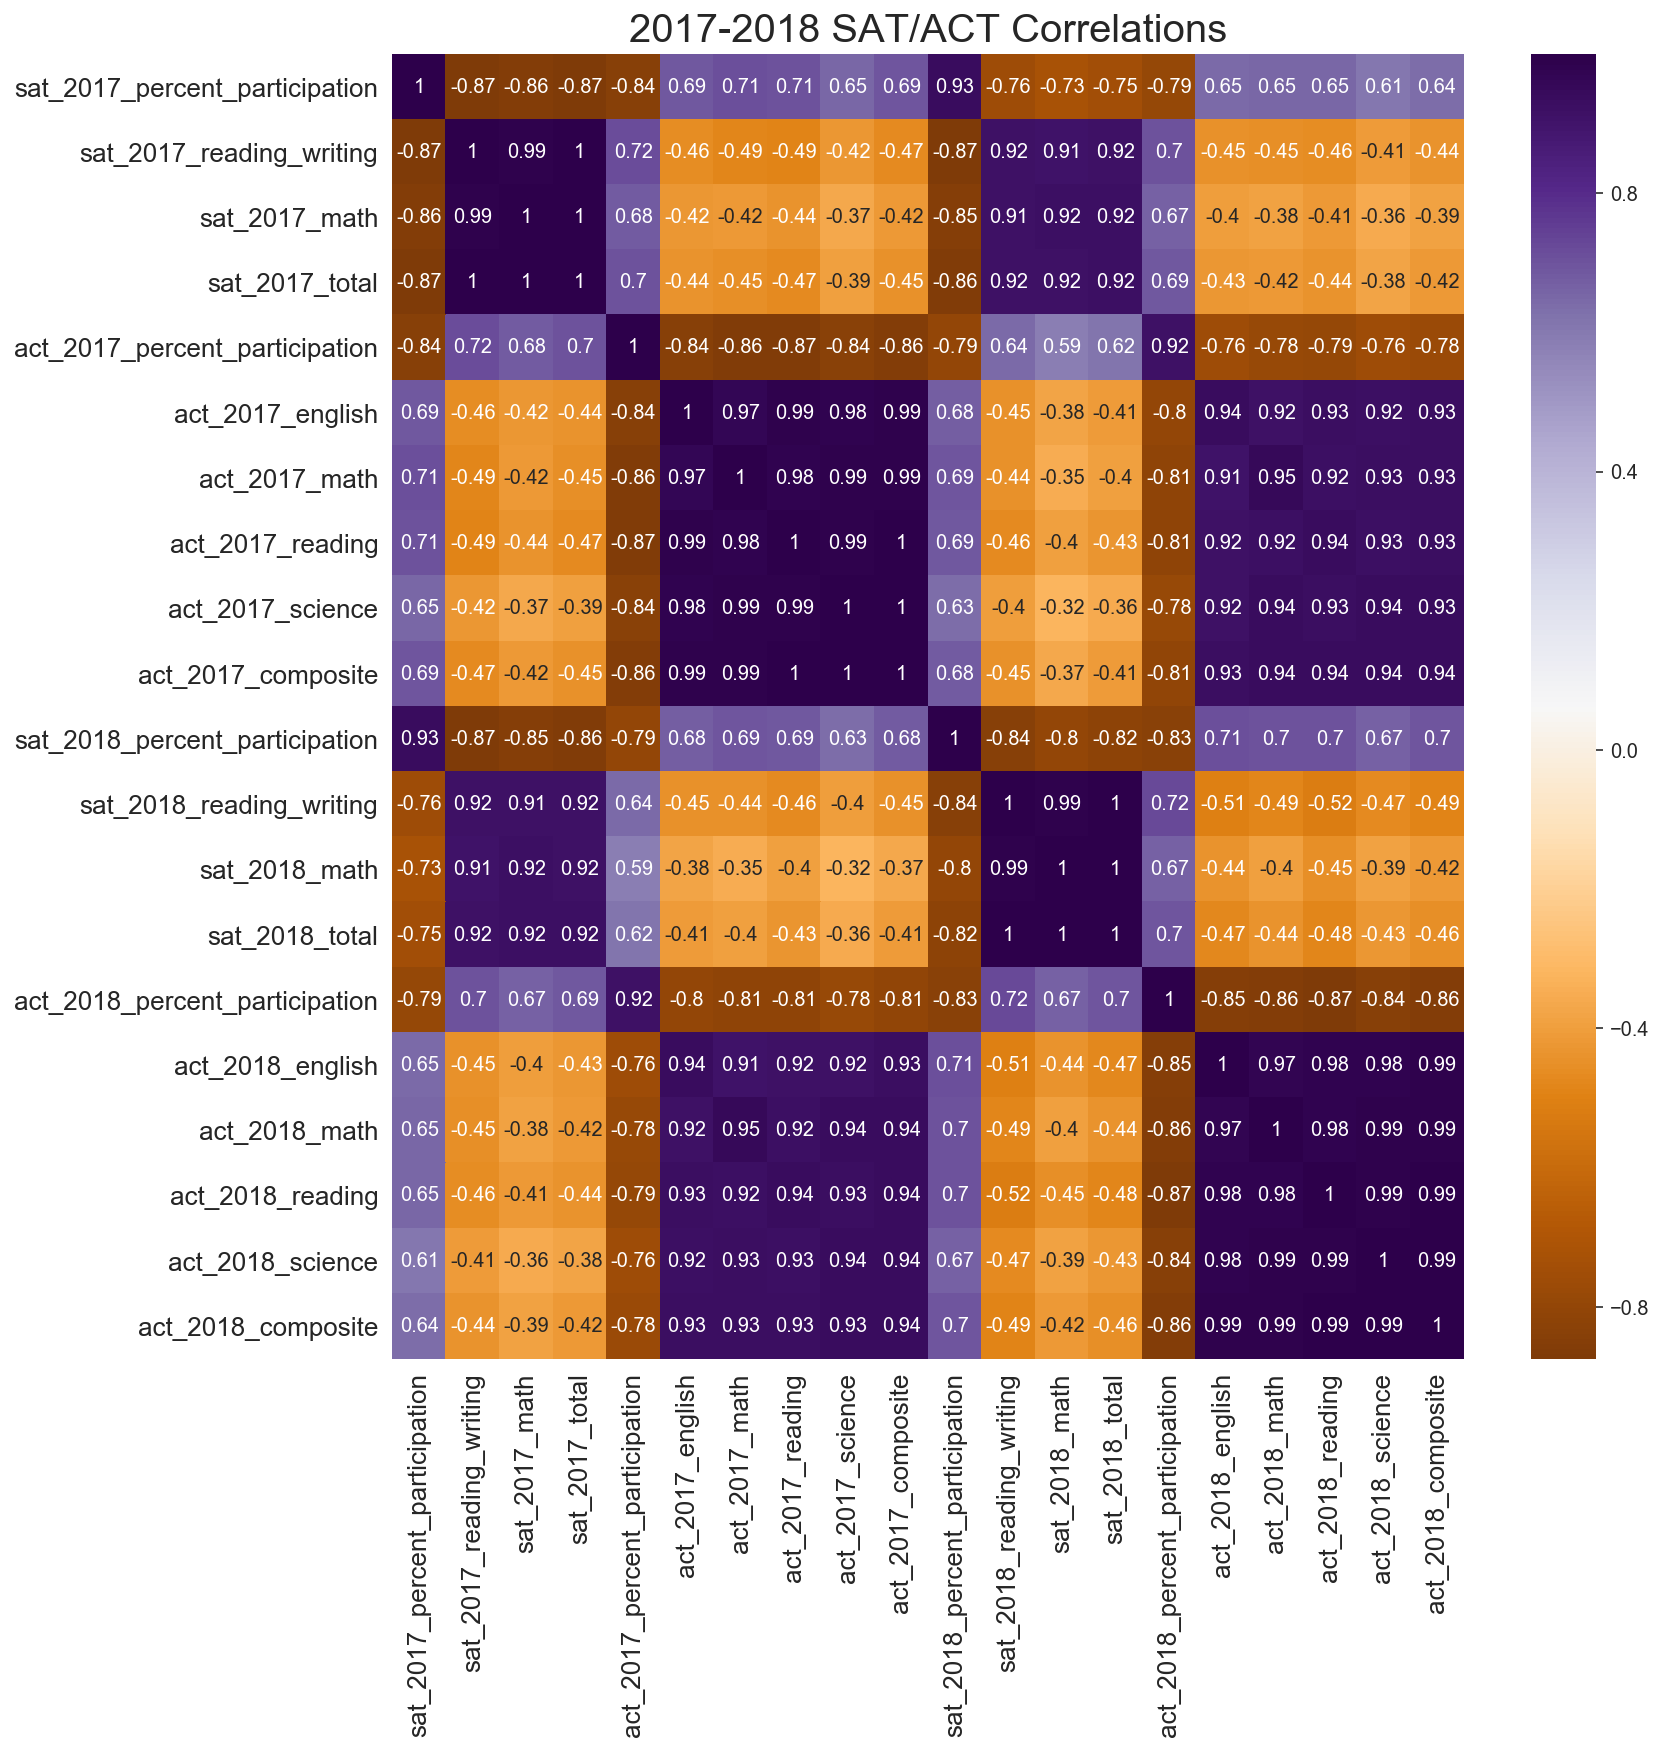

In [321]:
plt.figure(figsize = (12, 12))
heatmap = sns.heatmap(df.corr(), cmap = 'PuOr', annot = True,)
heatmap.set_title('2017-2018 SAT/ACT Correlations', Fontsize = 20)
heatmap.tick_params(axis='y', labelsize=13)
heatmap.tick_params(axis='x', labelsize=13)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [618]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns))/2) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])     # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

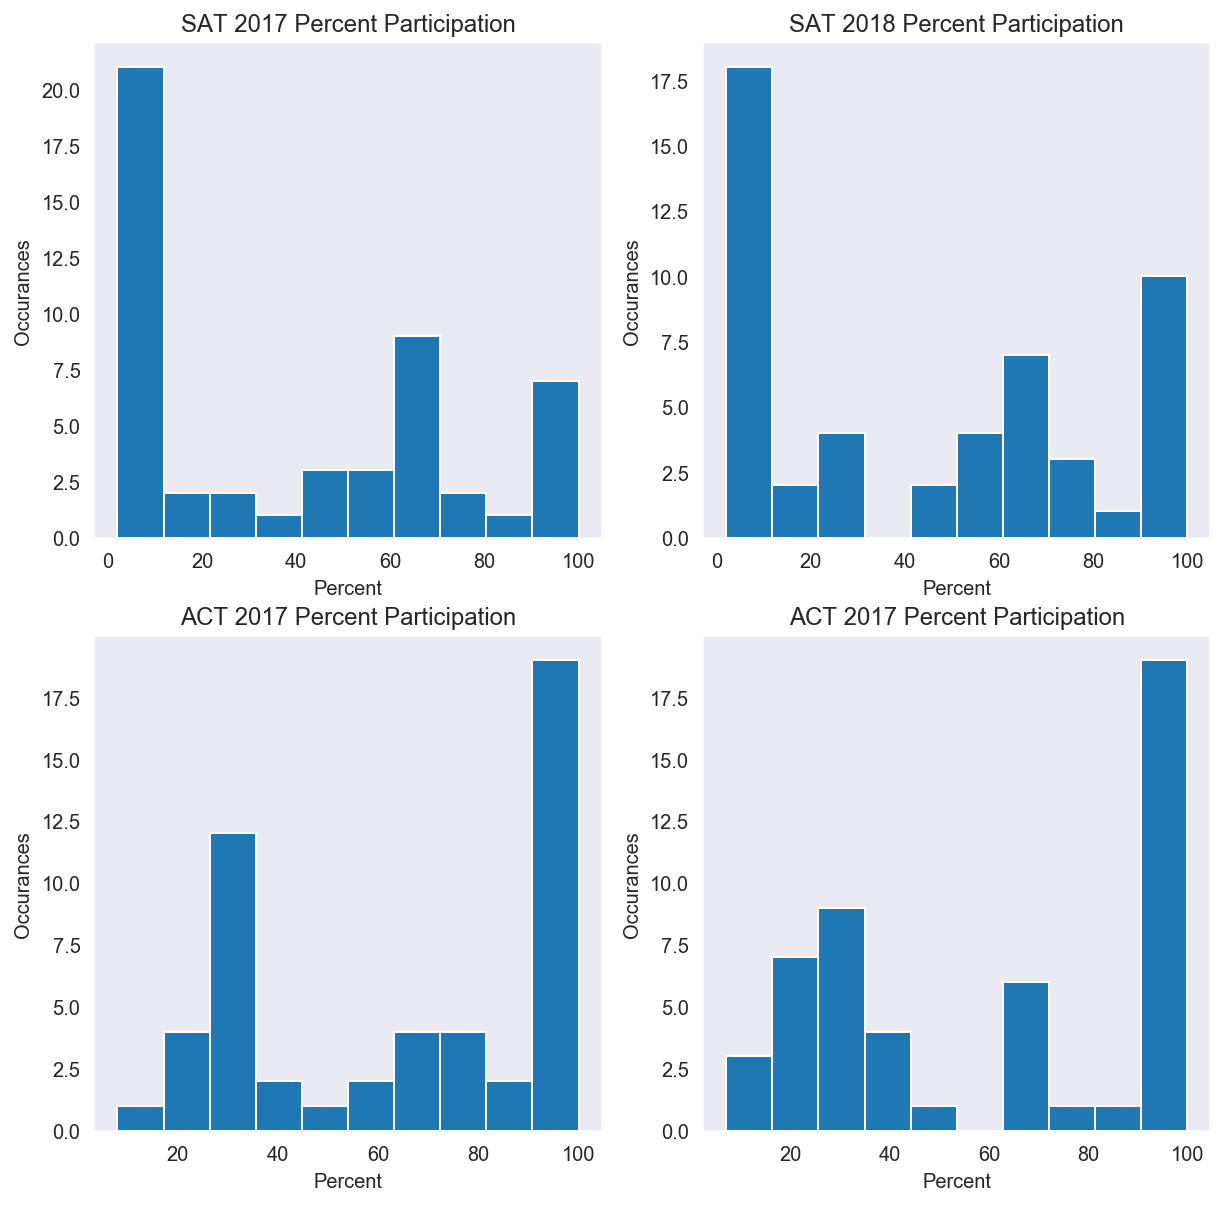

In [638]:
subplot_histograms(df, ['sat_2017_percent_participation', 'sat_2018_percent_participation', 'act_2017_percent_participation', 
                        'act_2018_percent_participation'], ['SAT 2017 Percent Participation', 'SAT 2018 Percent Participation',
                                                           'ACT 2017 Percent Participation', 'ACT 2017 Percent Participation'], 
                   ['Percent', 'Percent', 'Percent', 'Percent'], ['Occurances', 'Occurances', 'Occurances', 'Occurances'])
                  

 - ***SAT participation in both 2017 and 2018 has far more values between 0-20% compared to ACT participation which has far more values between 80-100%***

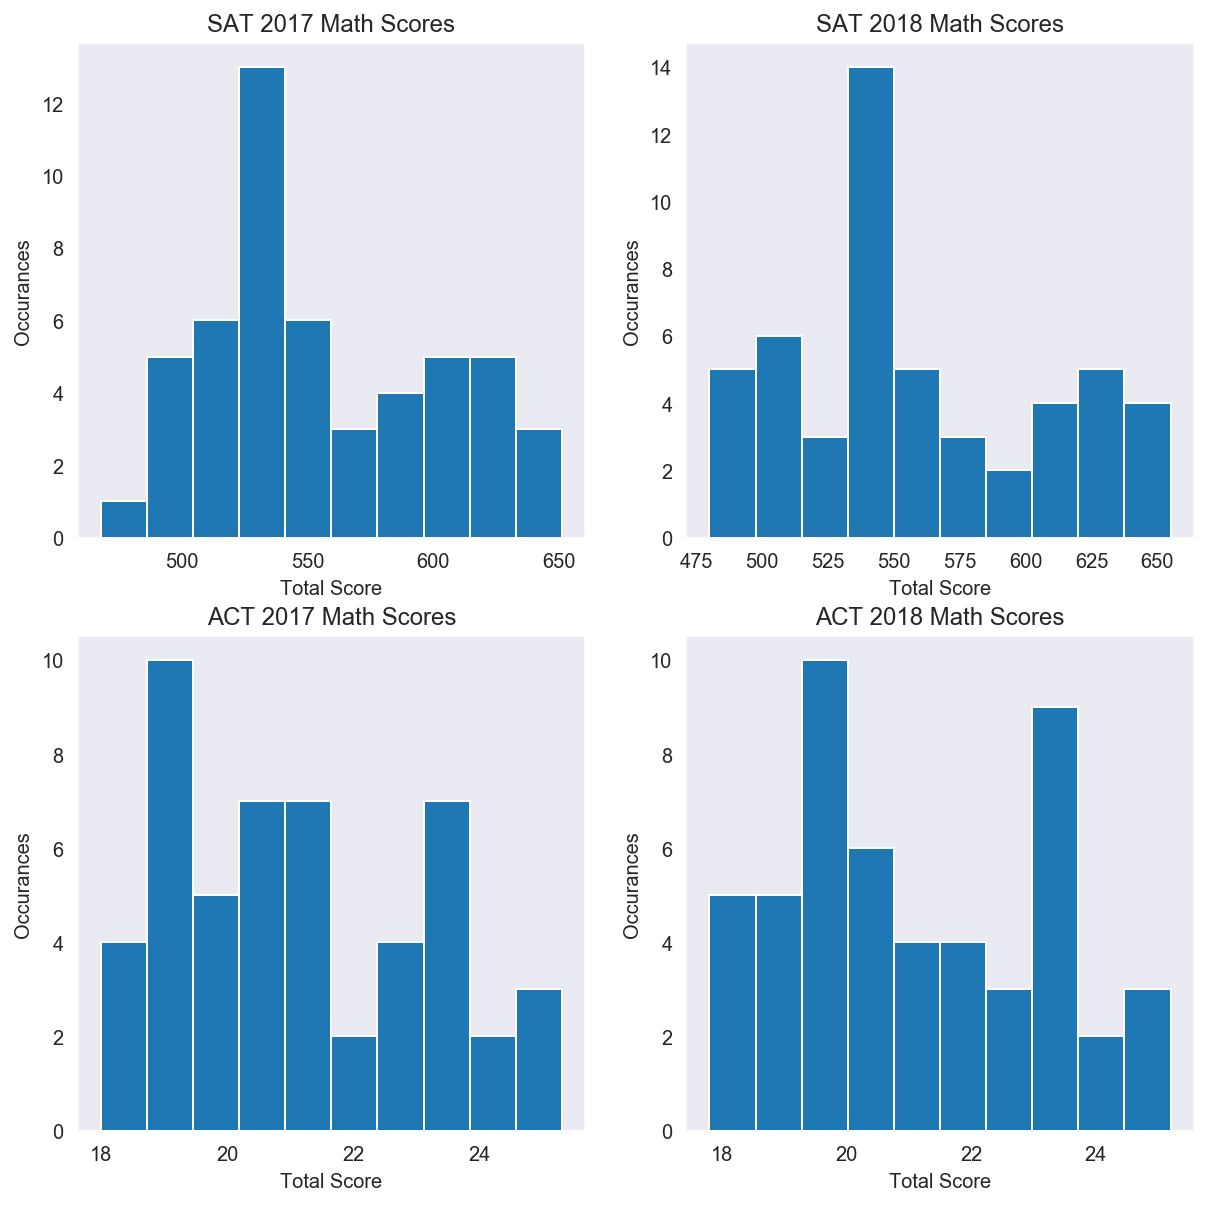

In [659]:
subplot_histograms(df, ['sat_2017_math', 'sat_2018_math', 
                        'act_2017_math', 'act_2018_math'], 
                   ['SAT 2017 Math Scores', 'SAT 2018 Math Scores', 
                    'ACT 2017 Math Scores', 'ACT 2018 Math Scores'], 
                   ['Total Score', 'Total Score', 'Total Score', 'Total Score'], 
                   ['Occurances', 'Occurances', 'Occurances', 'Occurances'])

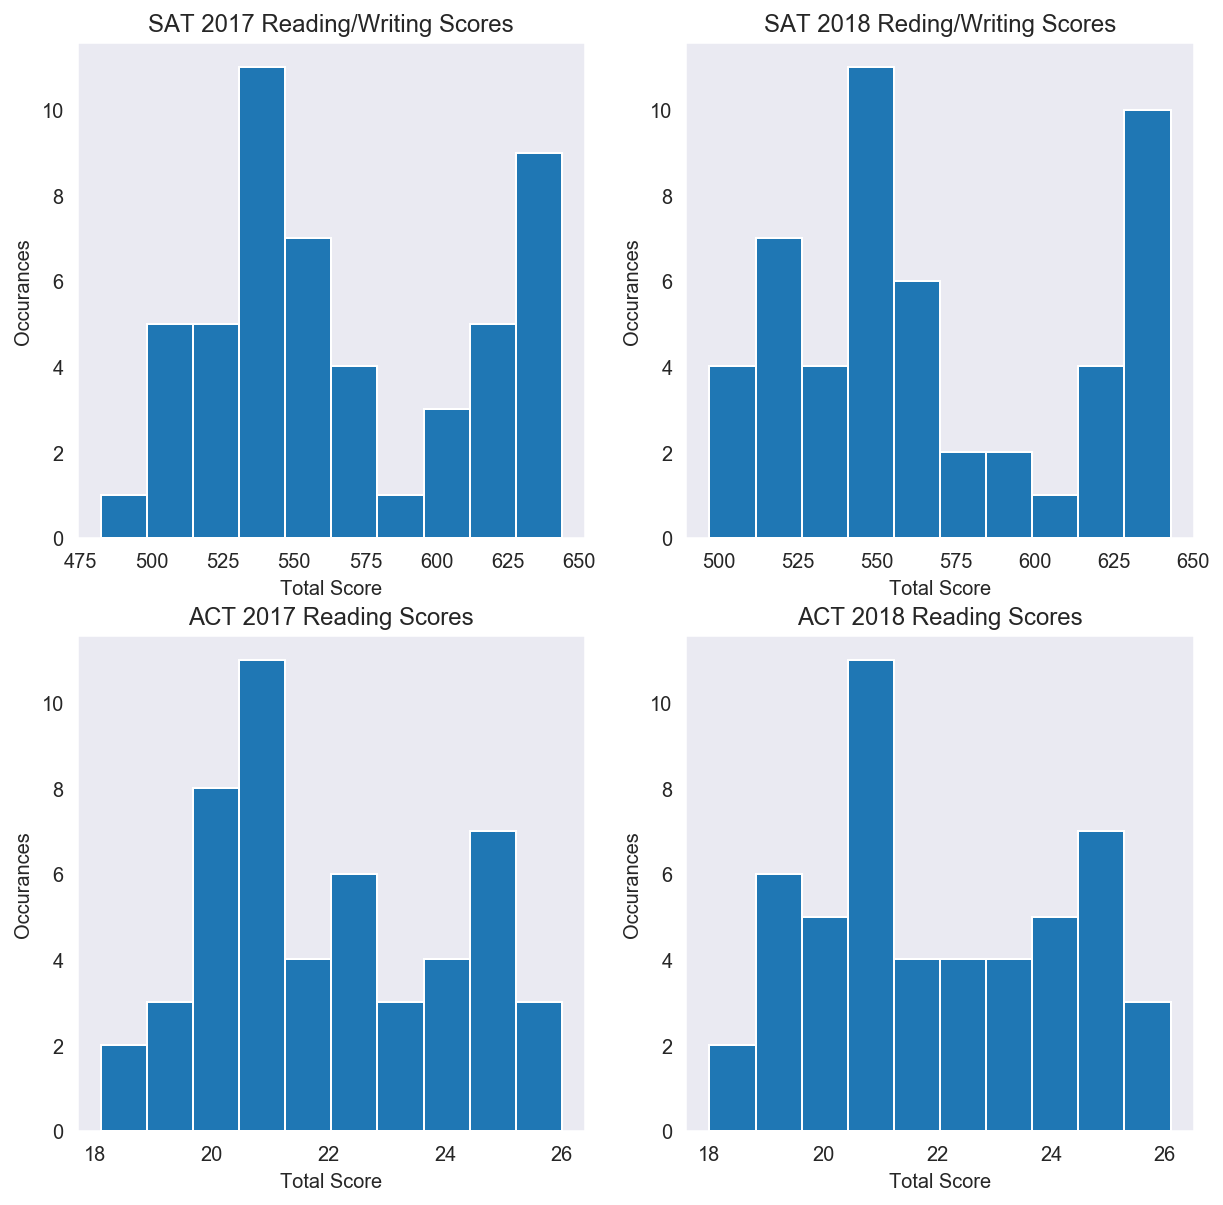

In [660]:
subplot_histograms(df, ['sat_2017_reading_writing', 'sat_2018_reading_writing', 
                        'act_2017_reading', 'act_2018_reading'], 
                   ['SAT 2017 Reading/Writing Scores', 'SAT 2018 Reding/Writing Scores', 
                    'ACT 2017 Reading Scores', 'ACT 2018 Reading Scores'], 
                   ['Total Score', 'Total Score', 'Total Score', 'Total Score'], 
                   ['Occurances', 'Occurances', 'Occurances', 'Occurances'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [366]:
#Defining a scatterplot function
def plot_scatter(dataframe, column1, column2, title, x_label, y_label):
    plt.scatter(dataframe[column1], dataframe[column2], c='orange')
    plt.title(title)
    plt.ylabel(y_label, fontsize = 12)
    plt.xlabel(x_label, fontsize = 12)
    

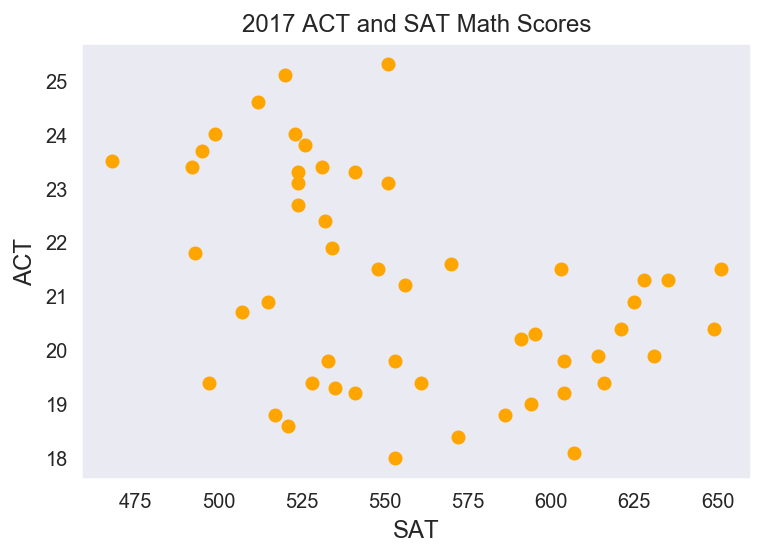

In [639]:
plot_scatter(df, 'sat_2017_math', 'act_2017_math', '2017 ACT and SAT Math Scores', 'SAT', 'ACT' )

>  - ***Not much of a discernable relationship here***

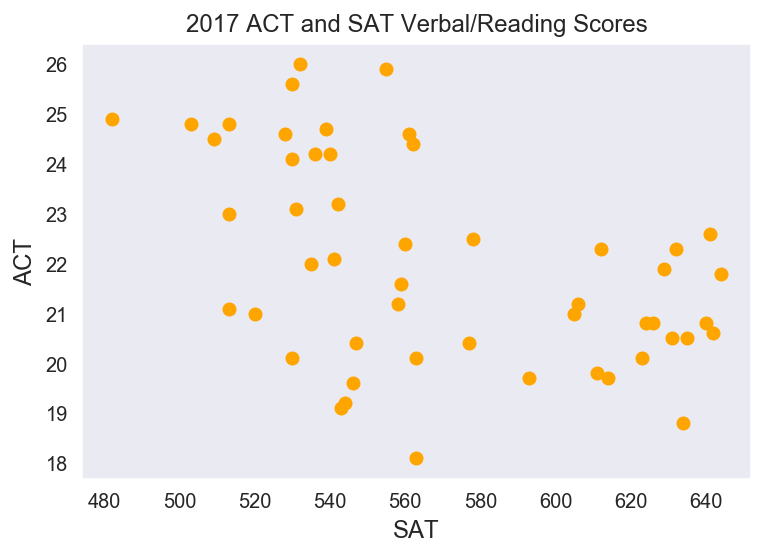

In [640]:
plot_scatter(df, 'sat_2017_reading_writing', 'act_2017_reading', '2017 ACT and SAT Verbal/Reading Scores', 
             'SAT', 'ACT')

> - ***There's a slight inverse correlation present here between ACT and SAT scores***

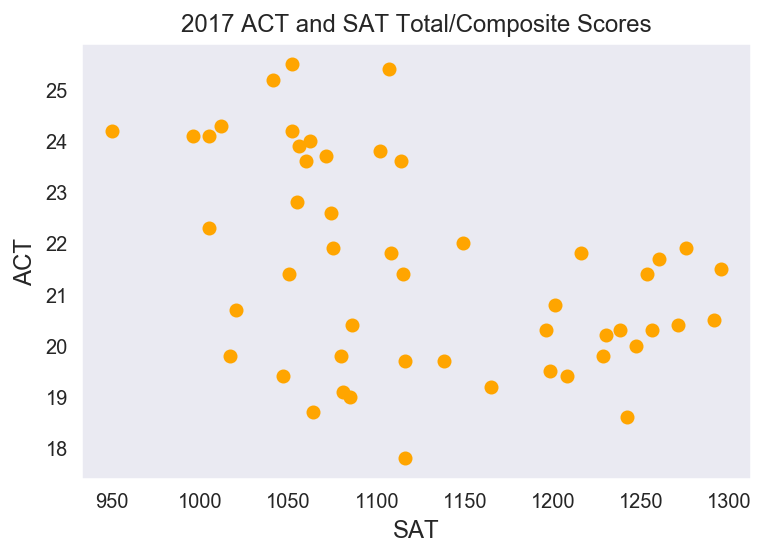

In [641]:
plot_scatter(df, 'sat_2017_total', 'act_2017_composite', '2017 ACT and SAT Total/Composite Scores', 'SAT', 'ACT')

> - ***Once again, there is a slight inverse correlation present here between ACT and SAT scores***

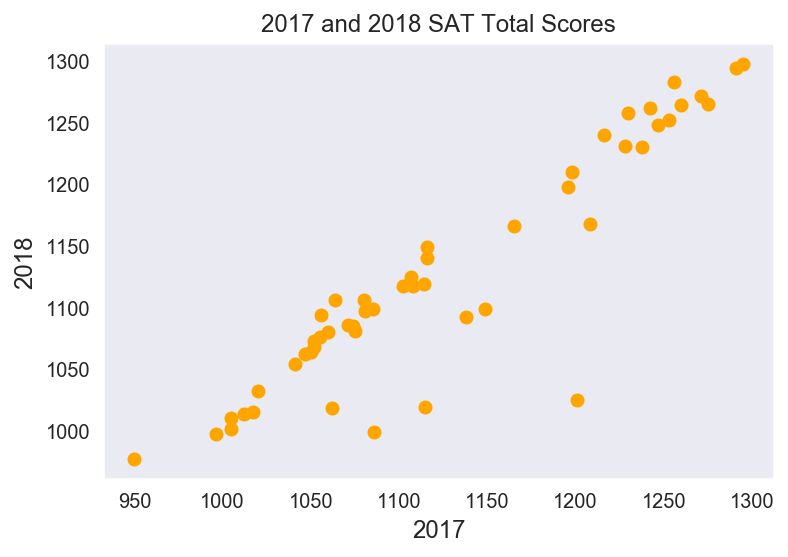

In [661]:
plot_scatter(df, 'sat_2017_total', 'sat_2018_total', '2017 and 2018 SAT Total Scores', '2017', '2018')

> - ***There is a strong correlation between 2017 and 2018 SAT scores***

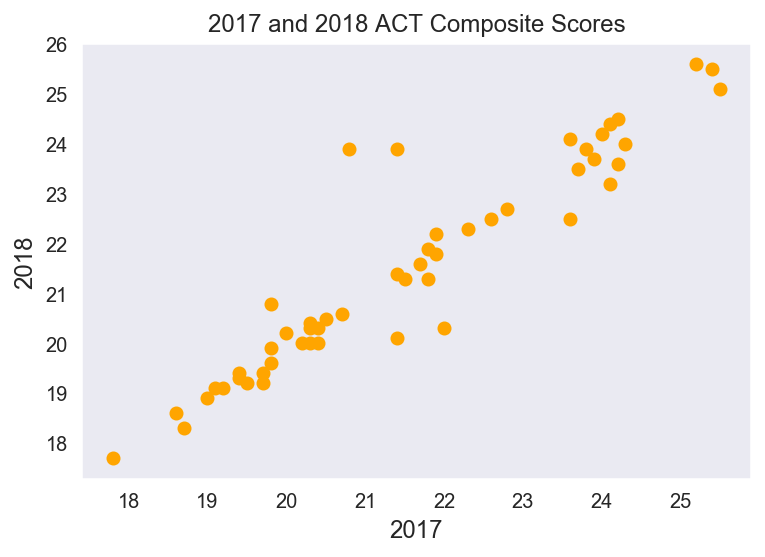

In [662]:
plot_scatter(df, 'act_2017_composite', 'act_2018_composite', '2017 and 2018 ACT Composite Scores', '2017', '2018')

> - ***There is a strong correlation beween 2017 and 2018 ACT scores***

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [663]:
#Creating a function that allows me to quickly create boxplots
#Everything that is in this function I got from seaborn documentation 
#(https://seaborn.pydata.org/generated/seaborn.boxplot.html)
def plot_boxplot(dataframe, columns, x_labels, y_label, title):
                 #Sets size 
                 plt.figure(figsize= (7, 7))
                 plt.title(title, size=20)
                 ax = sns.boxplot(data=dataframe[columns], width=0.3, palette='PuOr')
                 ax.set_xticklabels(x_labels, size = 12, rotation = 45)
                 ax.set_ylabel(y_label, size = 15)
                 
                 

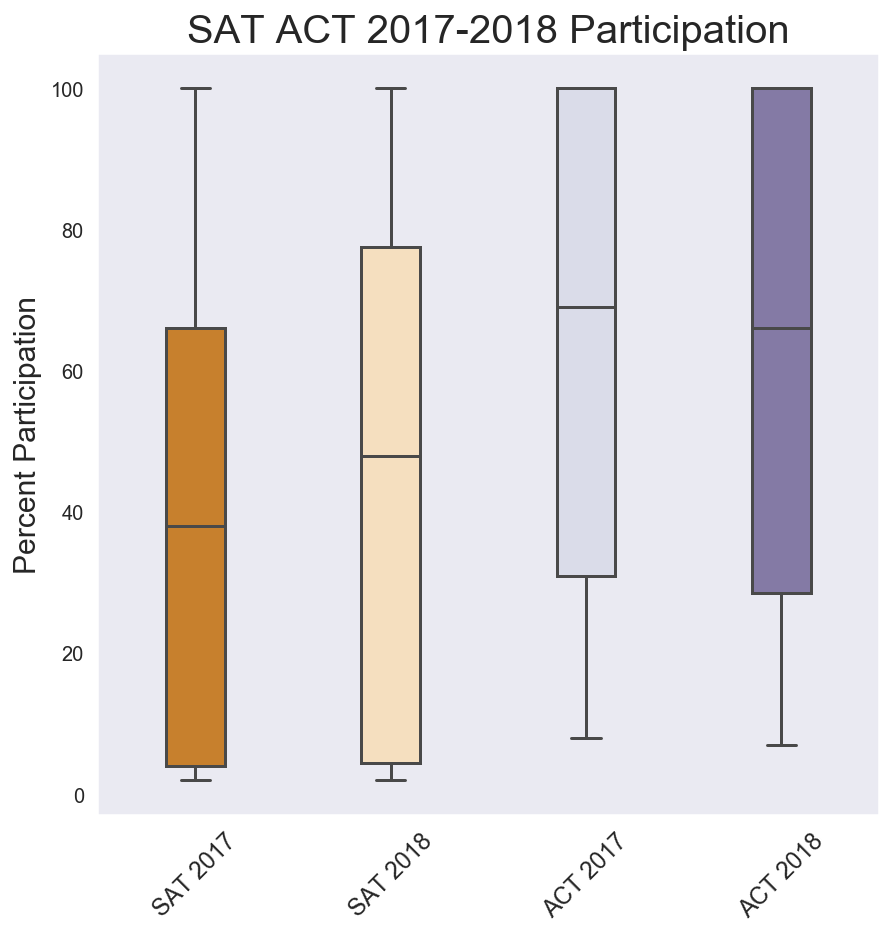

In [664]:
plot_boxplot(df, ['sat_2017_percent_participation', 'sat_2018_percent_participation', 
                  'act_2017_percent_participation', 'act_2018_percent_participation'], 
                 ['SAT 2017', 'SAT 2018','ACT 2017', 'ACT 2018'], 'Percent Participation', 
                 'SAT ACT 2017-2018 Participation')
              

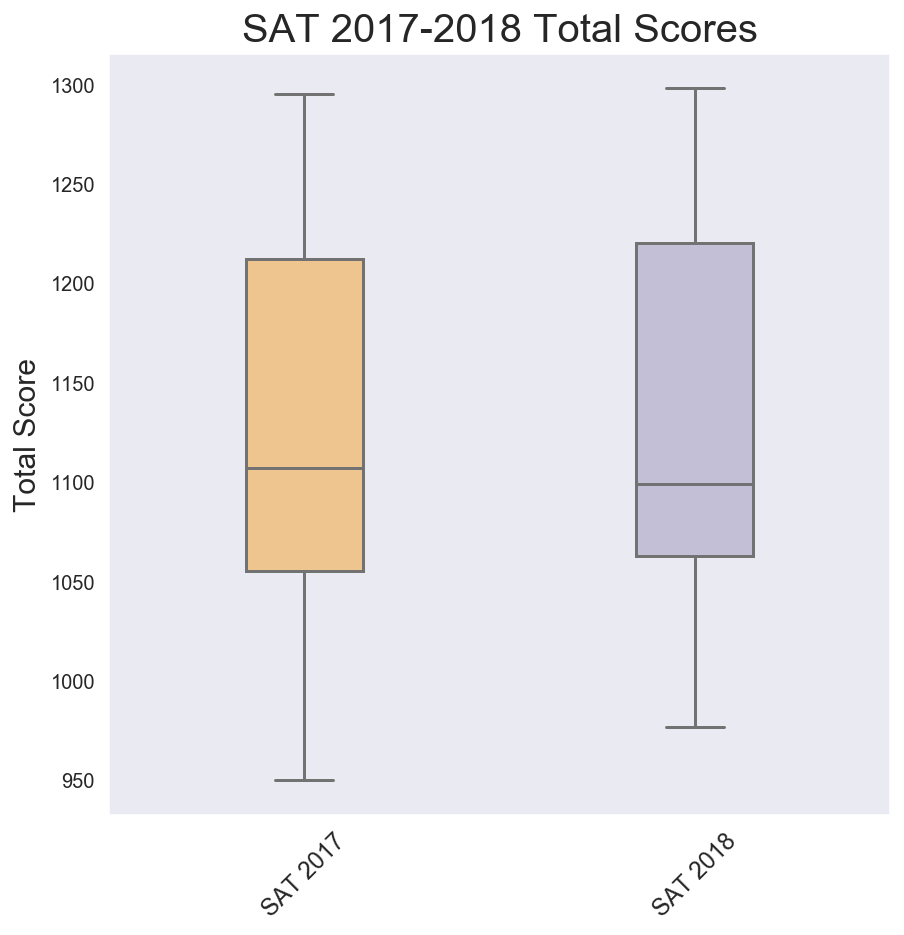

In [665]:
plot_boxplot(df, ['sat_2017_total', 'sat_2018_total'], ['SAT 2017', 'SAT 2018'],
                'Total Score', 'SAT 2017-2018 Total Scores')

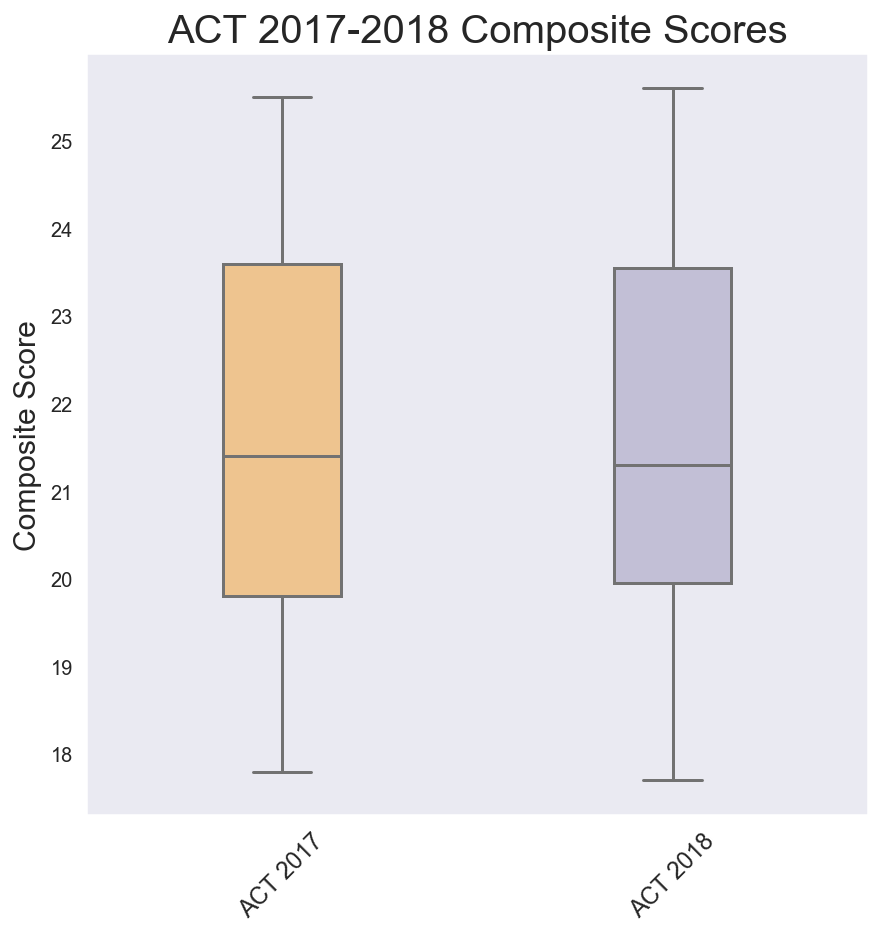

In [666]:
plot_boxplot(df, ['act_2017_composite', 'act_2018_composite'], ['ACT 2017', 'ACT 2018'], 
                  'Composite Score', 'ACT 2017-2018 Composite Scores')

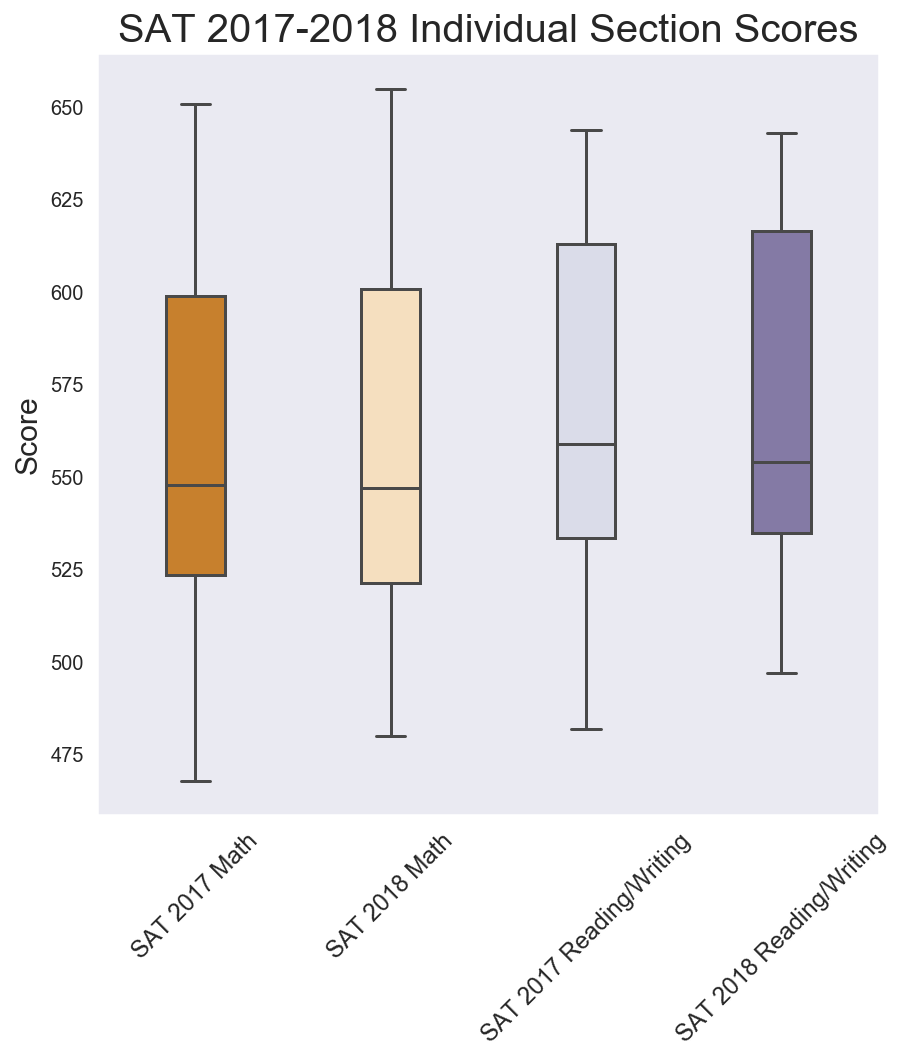

In [667]:
plot_boxplot(df, ['sat_2017_math', 'sat_2018_math', 'sat_2017_reading_writing', 'sat_2018_reading_writing'], 
             ['SAT 2017 Math', 'SAT 2018 Math', 'SAT 2017 Reading/Writing', 'SAT 2018 Reading/Writing'],
               'Score', 'SAT 2017-2018 Individual Section Scores')

In [450]:
df.columns

Index(['state', 'sat_2017_percent_participation', 'sat_2017_reading_writing',
       'sat_2017_math', 'sat_2017_total', 'act_2017_percent_participation',
       'act_2017_english', 'act_2017_math', 'act_2017_reading',
       'act_2017_science', 'act_2017_composite',
       'sat_2018_percent_participation', 'sat_2018_reading_writing',
       'sat_2018_math', 'sat_2018_total', 'act_2018_percent_participation',
       'act_2018_english', 'act_2018_math', 'act_2018_reading',
       'act_2018_science', 'act_2018_composite'],
      dtype='object')

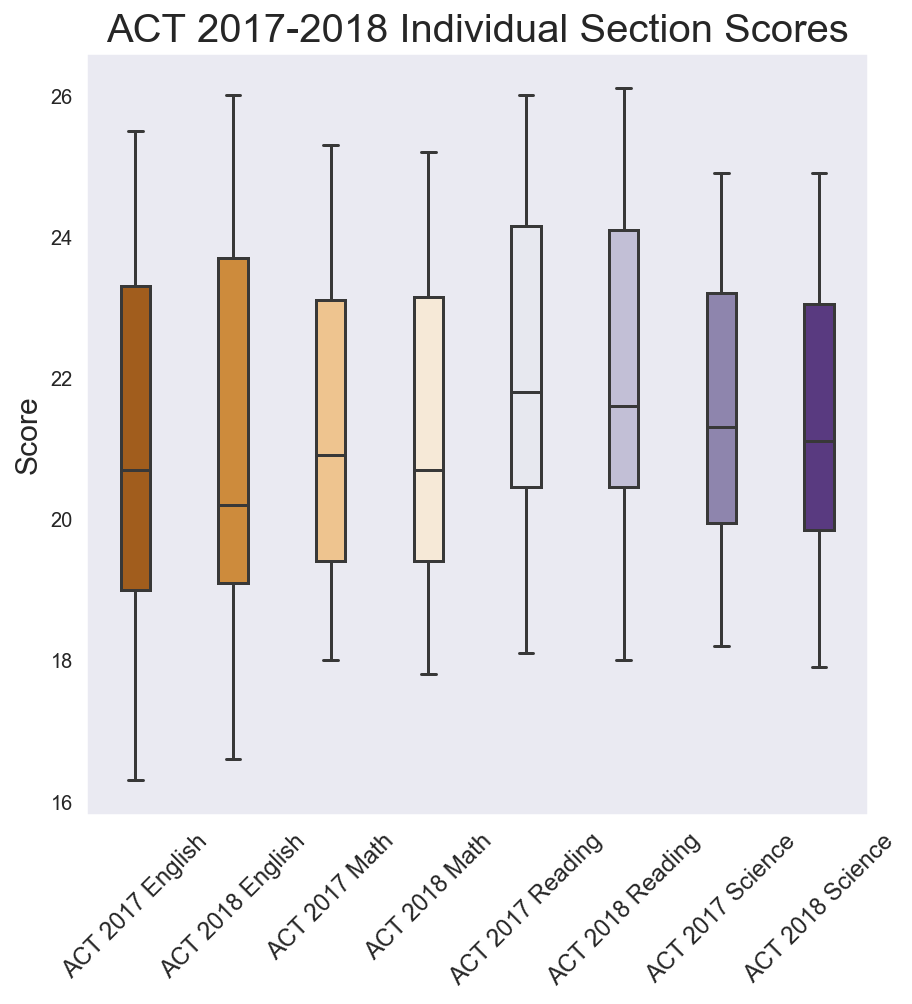

In [668]:
plot_boxplot(df, ['act_2017_english', 'act_2018_english', 'act_2017_math', 'act_2018_math',
                  'act_2017_reading', 'act_2018_reading', 'act_2017_science', 'act_2018_science'],
                 ['ACT 2017 English', 'ACT 2018 English', 'ACT 2017 Math', 'ACT 2018 Math',
                  'ACT 2017 Reading', 'ACT 2018 Reading', 'ACT 2017 Science', 'ACT 2018 Science'],
                 'Score', 'ACT 2017-2018 Individual Section Scores')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

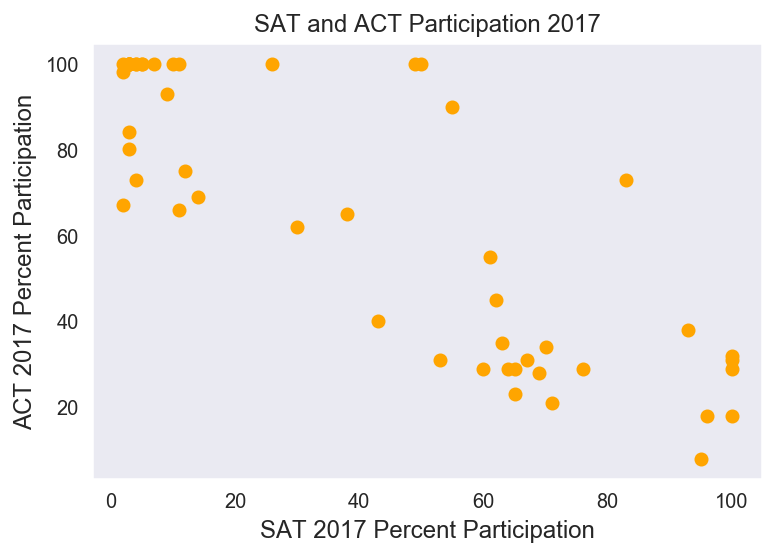

In [669]:
plot_scatter(df, 'sat_2017_percent_participation', 'act_2017_percent_participation', 
             'SAT and ACT Participation 2017', 'SAT 2017 Percent Participation', 'ACT 2017 Percent Participation')

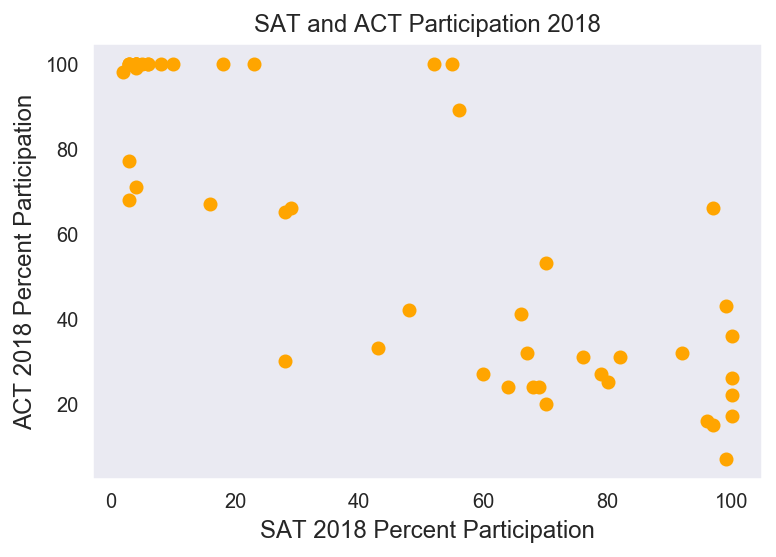

In [670]:
plot_scatter(df, 'sat_2018_percent_participation', 'act_2018_percent_participation',
            'SAT and ACT Participation 2018','SAT 2018 Percent Participation', 'ACT 2018 Percent Participation', )

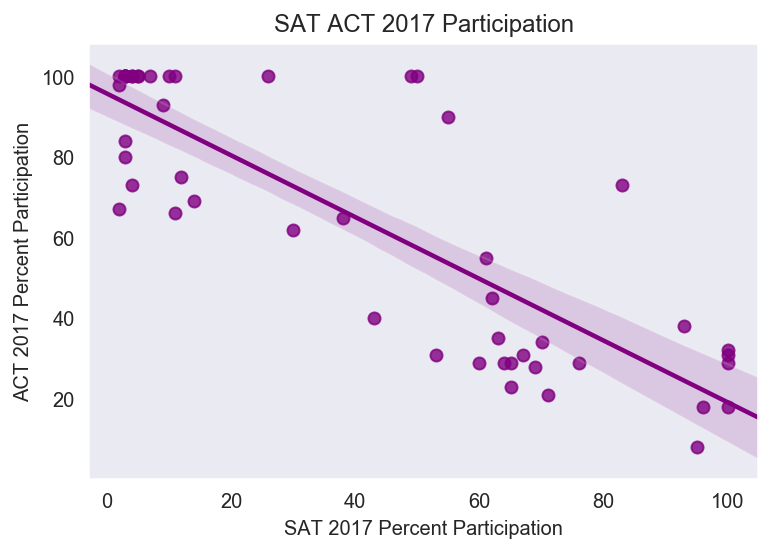

In [646]:
sns.set_style("dark")
plt.title("SAT ACT 2017 Participation")
ax = sns.regplot('sat_2017_percent_participation', 'act_2017_percent_participation', data=df, color = 'purple')
ax.set(xlabel='SAT 2017 Percent Participation', ylabel='ACT 2017 Percent Participation');




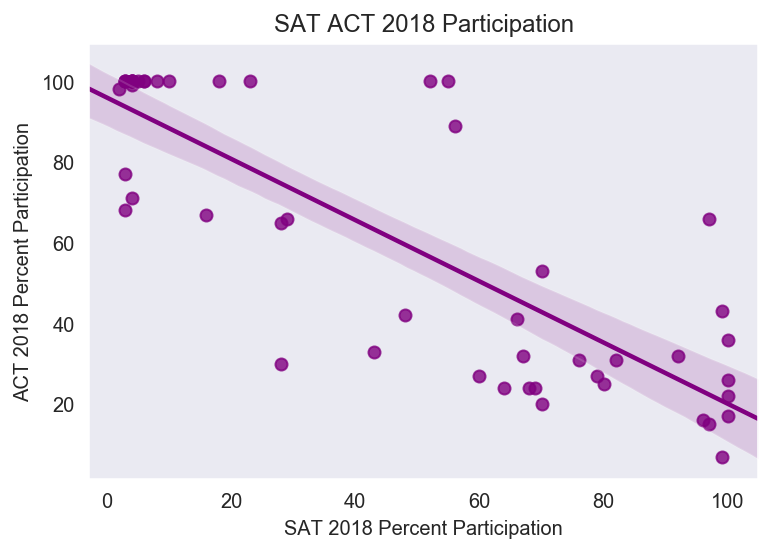

In [647]:
plt.title('SAT ACT 2018 Participation')
ax2 = sns.regplot('sat_2018_percent_participation', 'act_2018_percent_participation', data=df, color = 'purple')
ax2.set(xlabel='SAT 2018 Percent Participation', ylabel='ACT 2018 Percent Participation');

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [649]:
df.corr().head()

,sat_2017_percent_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,act_2017_percent_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_percent_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total,act_2018_percent_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
sat_2017_percent_participation,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748,0.934356,-0.761876,-0.726225,-0.745881,-0.792382,0.645332,0.649435,0.651892,0.611675,0.639323
sat_2017_reading_writing,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382,-0.874557,0.919264,0.906618,0.915870,0.702481,-0.447026,-0.450128,-0.460779,-0.410872,-0.440915
sat_2017_math,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817,-0.849180,0.912644,0.921334,0.920401,0.667444,-0.403532,-0.384444,-0.414636,-0.355104,-0.388769
sat_2017_total,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020,-0.864817,0.919121,0.917318,0.921406,0.687107,-0.426210,-0.418011,-0.438811,-0.383698,-0.415762
act_2017_percent_participation,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134,-0.794628,0.642885,0.586387,0.615553,0.919171,-0.763176,-0.782878,-0.789497,-0.763334,-0.775514


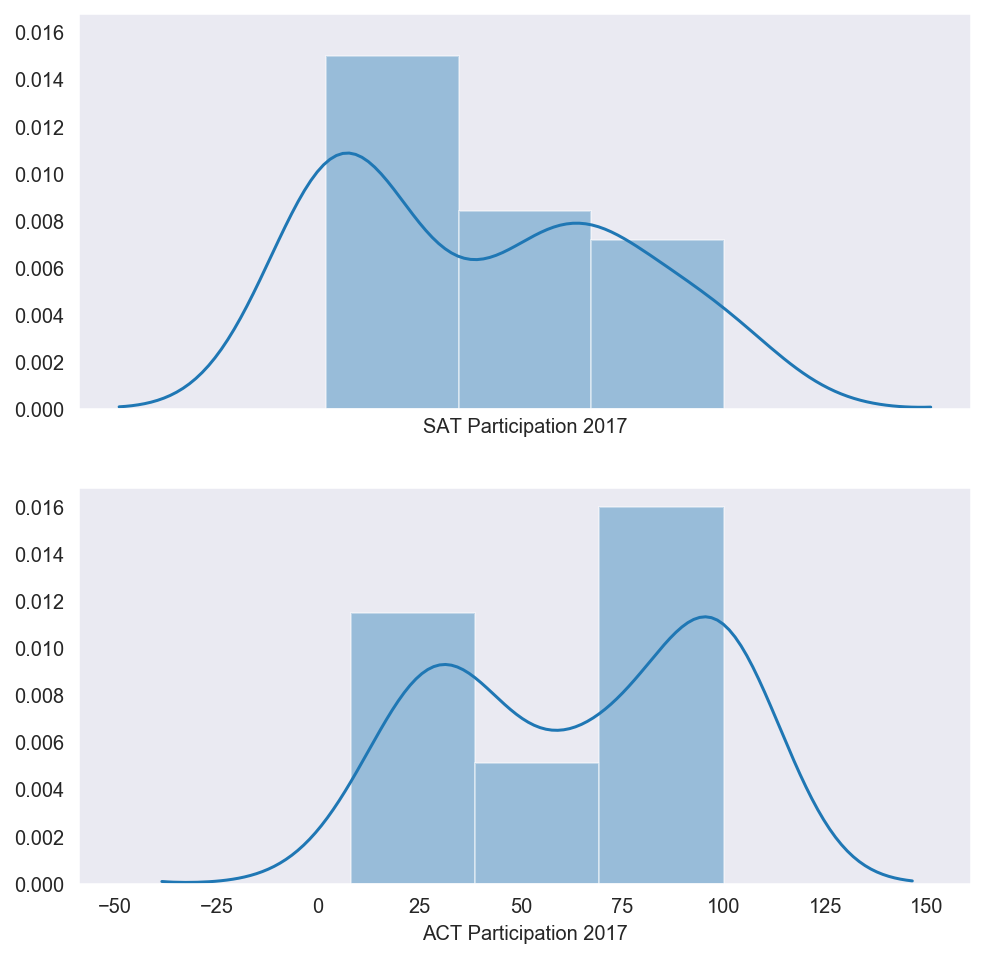

In [645]:
#Checking for normal distributions
fig, axes = plt.subplots(2, figsize=(8,8), sharex=True, sharey=True)
sns.distplot(df['sat_2017_percent_participation'], ax=axes[0], axlabel= "SAT Participation 2017");
sns.distplot(df['act_2017_percent_participation'], ax=axes[1], axlabel= "ACT Participation 2017");

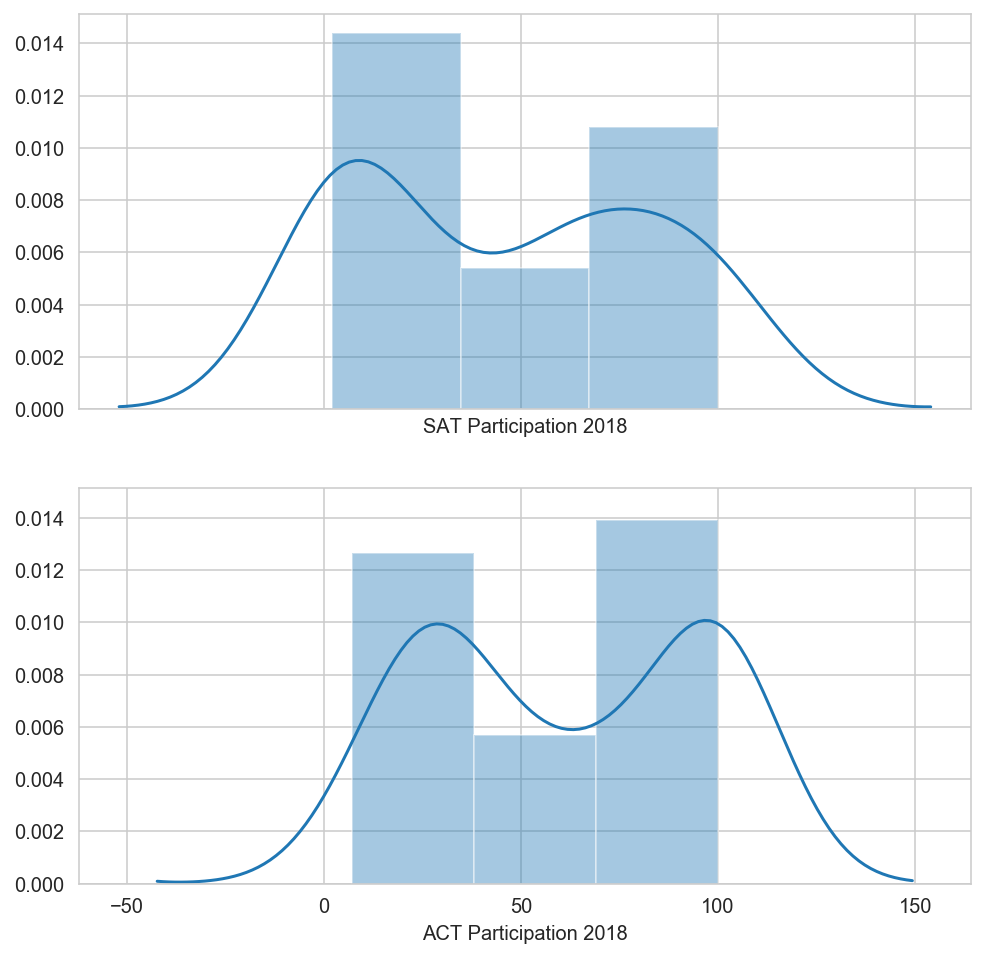

In [567]:
fig, axes = plt.subplots(2, figsize=(8,8), sharex=True, sharey=True)
sns.distplot(df['sat_2018_percent_participation'], ax=axes[0], axlabel= "SAT Participation 2018");
sns.distplot(df['act_2018_percent_participation'], ax=axes[1], axlabel= "ACT Participation 2018");

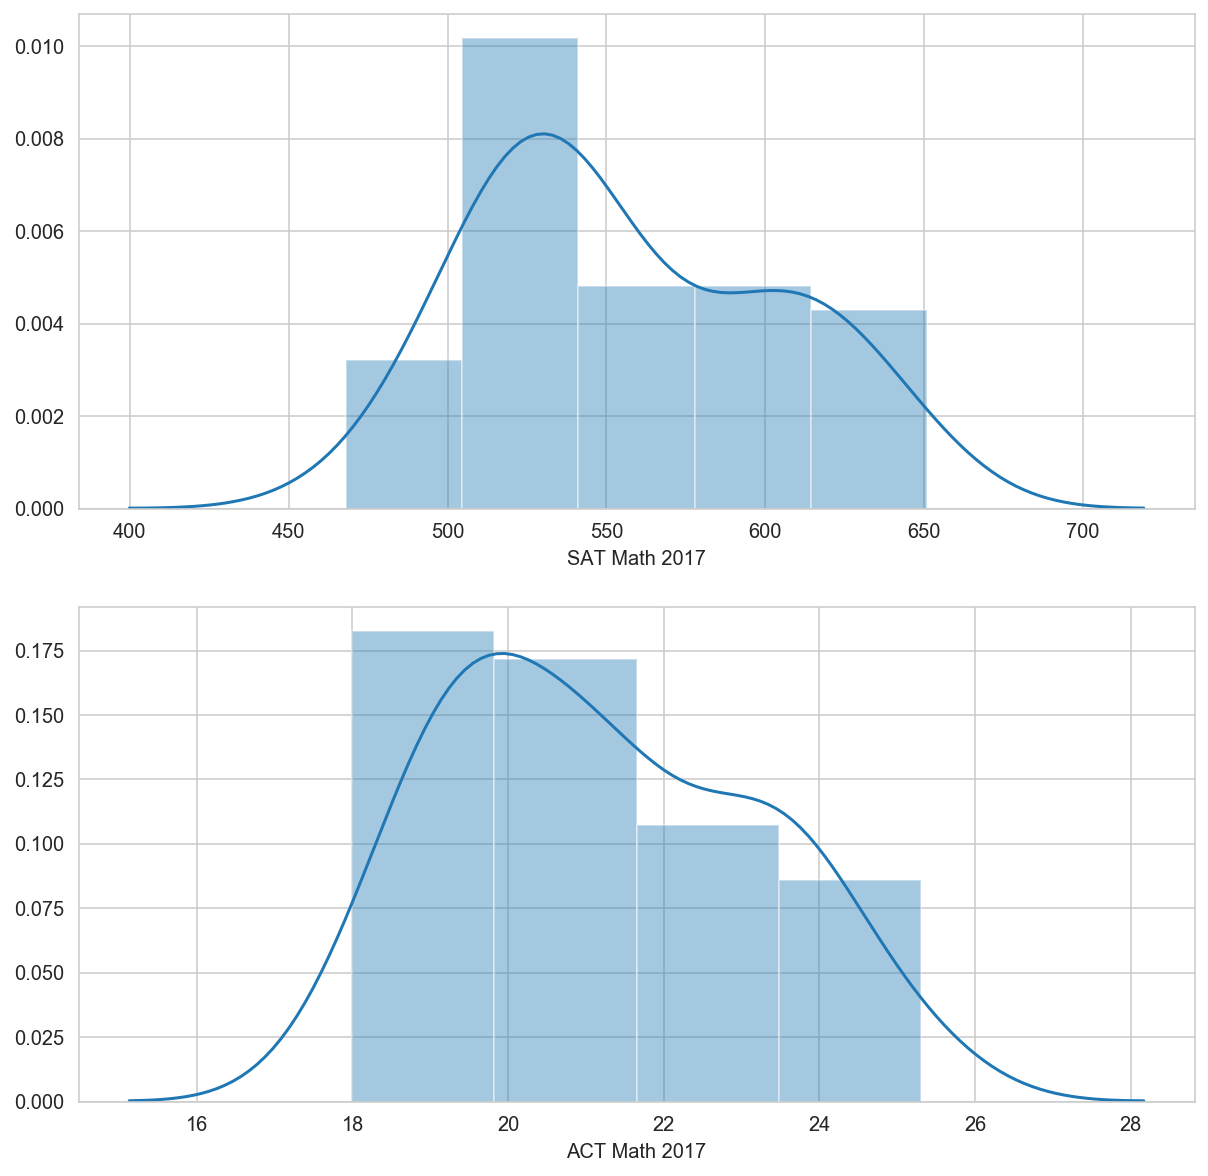

In [569]:
fig, axes = plt.subplots(2, figsize=(8,8), sharex=False, sharey=False)
sns.distplot(df['sat_2017_math'], ax=axes[0], axlabel= "SAT Math 2017");
sns.distplot(df['act_2017_math'], ax=axes[1], axlabel= "ACT Math 2017");

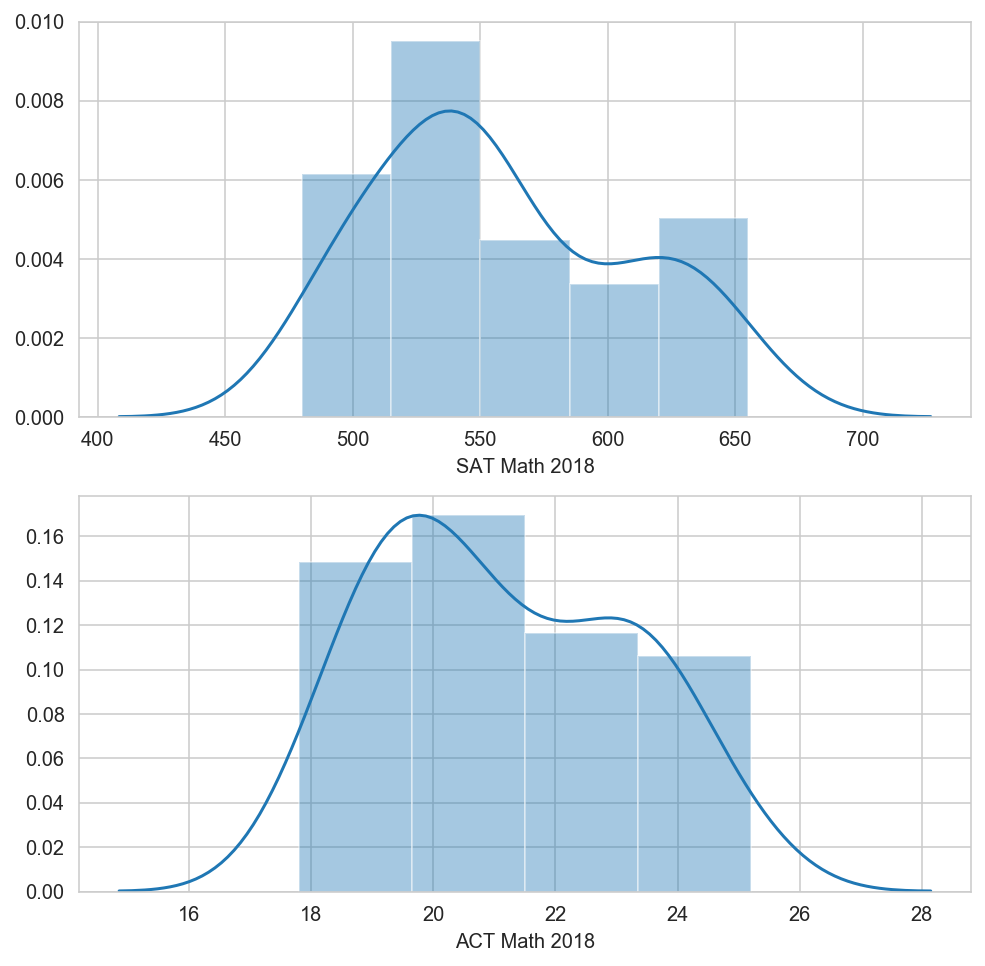

In [570]:
fig, axes = plt.subplots(2, figsize=(8,8), sharex=False, sharey=False)
sns.distplot(df['sat_2018_math'], ax=axes[0], axlabel= "SAT Math 2018");
sns.distplot(df['act_2018_math'], ax=axes[1], axlabel= "ACT Math 2018");

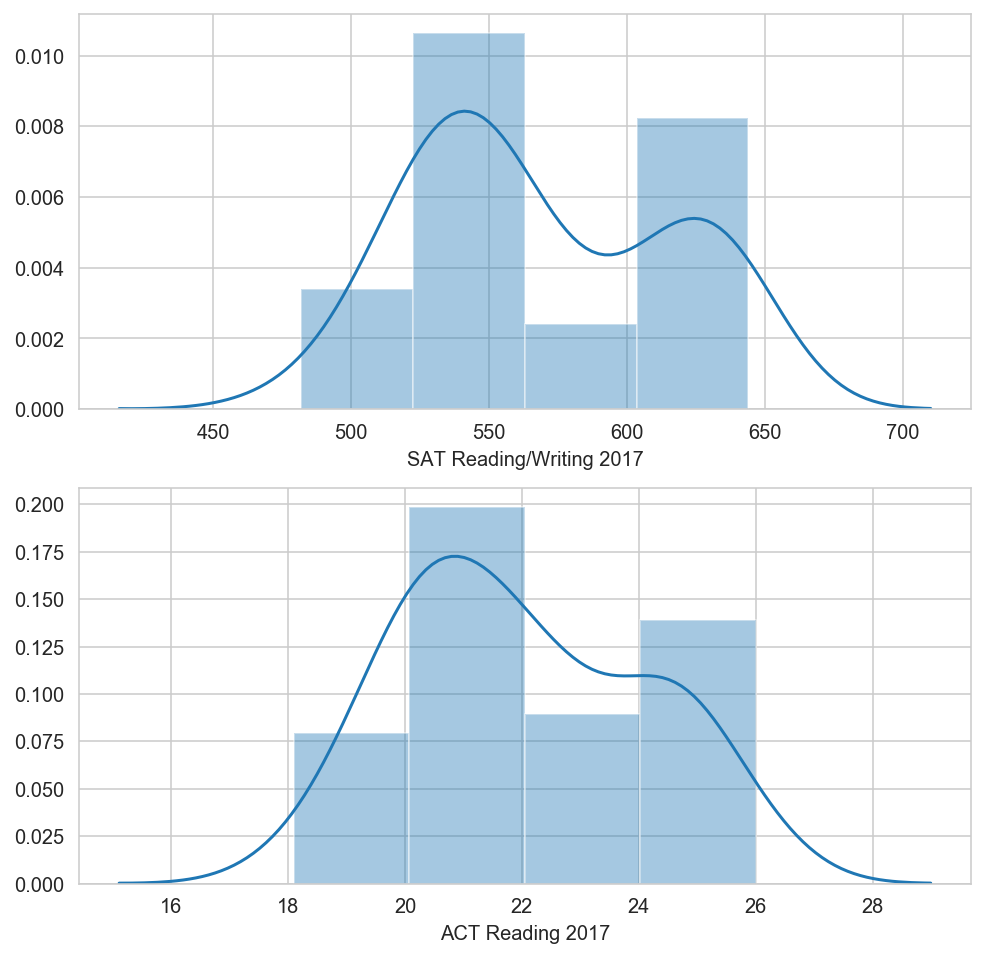

In [571]:
fig, axes = plt.subplots(2, figsize=(8,8), sharex=False, sharey=False)
sns.distplot(df['sat_2017_reading_writing'], ax=axes[0], axlabel= "SAT Reading/Writing 2017");
sns.distplot(df['act_2017_reading'], ax=axes[1], axlabel= "ACT Reading 2017");

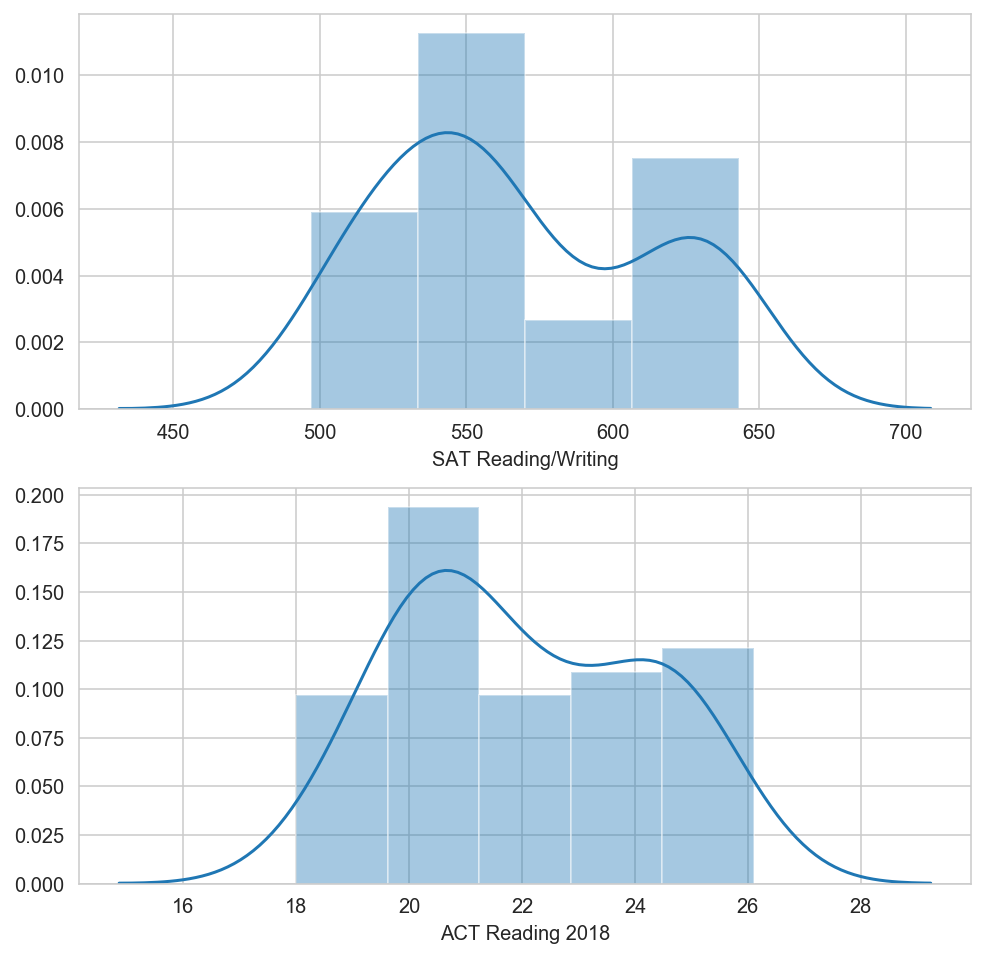

In [572]:
fig, axes = plt.subplots(2, figsize=(8,8), sharex=False, sharey=False)
sns.distplot(df['sat_2018_reading_writing'], ax=axes[0], axlabel= "SAT Reading/Writing");
sns.distplot(df['act_2018_reading'], ax=axes[1], axlabel= "ACT Reading 2018");

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

- ***No, no trend is observed. I think this is because of our population size of 51. If our population size was larger our distribution would likely more closely resemble normal distributions.***

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

> - ***Yes this assumption holds for Math, Reading, and participation rates. Once again, the small population size of 51 is affecting the shape of our distribution. Because of these high confidence intervals predicting values will be much more unreliable and less precise***

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*


Answer:

> - ***No I do not think it is approrpriate to conduct statistical inference with this data. Simply put: our population size is far too small for our conclusions to be meaningful and significant.***

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

> - ***It's hard to say. The math scores are scored differently in terms of point measurements but, for the most part, one can make similar inferences by looking at and comparing their distribution plots because despite the different measurement numbers, they still seem to conclude similar things. As with the rest of our data, the small size of our population still means it is not very appropriate to compare scores because of extremely large confidence intervals.***

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

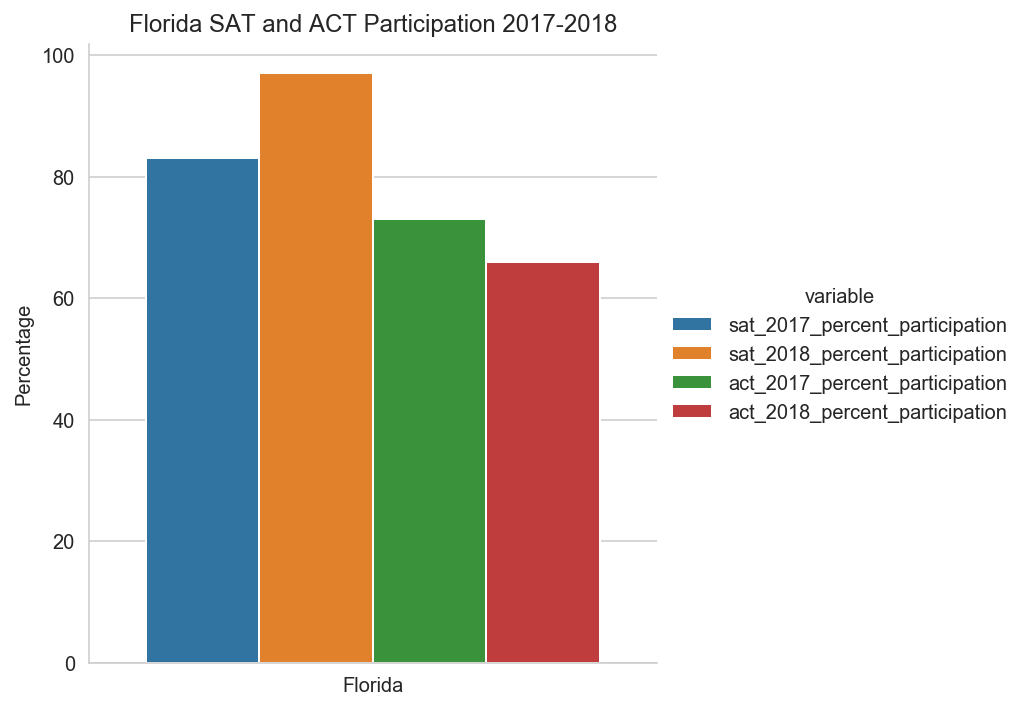

In [624]:
# This code heavily influenced by code from seaborn documentation, stackoverflow, and copious amounts of google searching
# So that I could understand .melt, and just how to do all this complicated seaborn barchart creation.
# As an aside: I would love for this stuff to come more naturally in the future because figuring out how to
# make this simple bar chart was akin to opening the gates of hell and staring in.

columns = [ 'state', 'sat_2017_percent_participation', 'sat_2018_percent_participation', 
        'act_2017_percent_participation', 'act_2018_percent_participation'] #Declaring a column variable with columns that will be used in bar chart for simplicity's sake
florida = df[df['state'] == 'Florida'][columns] #Declaring florida variable
florida = florida.melt(id_vars='state') #Using the .melt method on florida to "unpivot" florida data into long format so I can plot it correctly
ax = sns.catplot(x='state', y='value', hue='variable', data=florida, kind='bar'); #sets parameters for boxplot
plt.title('Florida SAT and ACT Participation 2017-2018'); #Titles boxplot
ax.set_ylabels("Percentage"); #Sets Y axis name
ax.set_xlabels(""); #Sets X axis name



https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html
https://www.khanacademy.org/test-prep/sat

### Florida as an example of increasing SAT participation and lowering ACT participation
- Florida had a significant increase in SAT participation and a decrease in ACT participation between 2017-2018. This could be attributed to many school districts in Florida offering free SAT events during school days where students do not have to pay out of pocket to take the test and the school pays for them, instead. 

### Khan Academy SAT Prep
- Khan academy offers free SAT prep classes. Emphasizing these free prep classes alongside free SAT events at schools could significantly increase SAT participation rates.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

- ***The SAT likely needs to compete with the ACT to increase its participation rates. For states where participation is very low like Arkansas, Alabama, and Mississippi, here are a few ways they could do this:*** 
 > - The college board could cooperate and negotiate with school districts so they pay for the SAT, not the students
 > - Promote free tools for improving SAT scores like Khan Academy
 > - Work with state governments to push for mandatory SAT participation
 > - Make changes to the SAT so it has more in common with the ACT

- ***As for additional data:***
> - Having a larger population size would have been immensely helpful for data reliability and smaller confidence intervals. If we were working with County averages rather then State averages, perhaps our population size would not have been as much of a problem.
> - Having access to ACT/SAT datasets from 2016 and 2017 could have been helpful to see if participation rates were steadily increasing or decreasing. It is hard to discern whether or not something is growing between years if all we have access to is two years of data.

